## Исследование данных о российском кинопрокате



### Первоначальное изучение данных и объединение их в один датафрейм. 


In [1]:
import pandas as pd #Импорт библитеки pandas
import matplotlib.pyplot as plt #Импорт библиотеки matplotlib
import numpy as np #Импорт библиотеки numpy

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
def uniquev(df_type,column): #функция для подсчета уникальных значений столбца
    print(df_type[column].value_counts())
    
    
def division(column_name,column_old): #функция для разделения строки и вывода первого значения в новый столбец
     df[column_name] = df[column_old].str.split(',',n=1)
     df[column_name] = df[column_old].str.split(',',n=1,expand=True)
    
def plotting(df,kind_plot,column):
    df.plot(y=column,kind=kind_plot,grid=True)
    
def boxplotting(column):
    df[column].boxplot()

In [4]:
df = pd.read_csv('/datasets/mkrf_movies.csv')
df_2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [5]:
df.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
display(df.head())
display(df_2.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


Получив первичную информацию о двух датафреймах можно увидеть что всего в первом датафрейме 7486 строк, при этом 332 фильма финансировались государством. В столбцах `producer`, `ratings`, `genres` присутствует большое количество пропущенных значений, а в столбцах `film_studio`, `director` присутствует малое (незначительное) количество пропущенных данных.

Во втором датафрейме всего 3158 строк, при этом значения в столбце `pd_number` относятся к типу integer, в то время как в первом датафрейме к object и для правильного совмещения таблиц оба эти столбца нужно привести к типу object. 

Данные в столбцах `show_start_date` нужно привести к типу time, в `rating` к типу float

In [7]:
df_2['puNumber'] = df_2['puNumber'].astype(str) #Изменение типа данных в `puNumber` на строчный
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


После изменения типов данных можно соединять два датафрейма в один

In [8]:
df = df.merge(df_2,  on='puNumber',how='outer') #Соединение двух таблиц в одну по столбцу `puNumber`
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Можно увидеть, что объединение прошло успешно, так как все данные столбцов `box office` из второго датафрейма вошли в общий датафрейм

### Предобработка данных

#### Изменение типов данных

Нужно заменить значения в столбце `ratings` на float

In [9]:
print(df['ratings'].unique())
#df['ratings'] = df['ratings'].astype(float)
#df.info()

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1']


По полученной информации мы видим, что часть значений записываются как число со знаком процента, из-за знака процента невозможно привести данные к типу float, значит нужно привести все оценки к единой системе

In [10]:
df['ratings'] = df['ratings'].replace('%','',regex=True) #Удаление знака процента в строках
df['ratings'] = df['ratings'].astype(float) #Приведение всех значений к типу float
df.loc[df['ratings']>10, 'ratings'] = df['ratings']/10 #Приведение всех значений, которые были в процентах к 10 балльной системе оценивания
print(df['ratings'].unique())

[7.2 6.6 6.8 7.7 8.3 8.  7.8 8.1 7.1 6.  7.4 5.8 8.7 6.3 6.9 5.  4.3 7.3
 7.  6.4 nan 8.2 7.5 6.7 7.9 5.9 6.2 5.6 6.5 2.4 7.6 6.1 8.6 8.5 8.8 5.5
 5.1 5.7 5.4 9.9 4.4 4.5 5.3 4.1 8.4 2.6 3.8 4.6 4.8 4.  3.  1.6 4.2 5.2
 4.7 4.9 3.9 2.7 3.3 2.9 2.8 3.7 1.4 3.1 9.7 3.5 3.2 1.5 2.1 2.5 9.2 3.4
 1.1 3.6 9.1 9.4 9.  1.9 1.  8.9 1.3 1.8 1.2 1.7 9.8]


Все значения в столбце `ratings` были приведены к единой систему оценок и к типу float

Также значения в столбце `show_start_date` к типу date

In [11]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


#### Изучение пропусков в датафрейме

In [12]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Во время первичного обзора данных были обнаружены пропуски в столбцах `film_studio`, `production country`,`director`, `producer`, `refundable_suppor`, `nonrefundable_support`, `budget`, `financing_source`, `ratings`, `genres` и `box_office` 

В первых 4 столбцах мы не можем никак заменить пропуски, так как каждое значение должно быть уникальным, да и эти данные не являются важными для нашего исследования. Столбцы `refundable_suppor`, `nonrefundable_support`, `budget`, `financing_source` показывают какие фильмы финансировались государством, конечно, оставшиеся пропуски можно было заполнить нулями, но это повлияет при вычислении среднего и других показателей, так что лучше оставить их пропущенными. Тоже самое можно сказать и о столбце `box_office`. Столбец `raitings` также является важной частью нашего исследовании, но его значения могут колебаться от 0 до 10 и никак не зависит от среднего или медианного, так что пропуски придется просто оставить, также как и столбец `genres`

#### Шаг 2.3. Изучение дубликатов в датафрейме


In [13]:
print(df.duplicated().sum())
print(df.duplicated(subset=['title']).sum())

0
714


При проверке на явные дубликаты, мы можем видеть, что такие отсутствуют, но при этом может быть так, что фильмы отличаются лишь номером прокатного удостоверения, например, было обнаружено 714 строк с одинаковым названием фильма, но мы не можем убирать эти строки как дубликаты, так как мы имеем данные российского проката, то эти фильмы просто могли выходить в прокат в разное время и удостроверения могли выдаваться разным компаниям, а следовательно данные этих фильмов не являются дубликатами, а всего лишь данными о разных прокатах и они нам нужны будут для дальнейшего исследования. Поэтому нужно проверить есть ли строки где все одинаковое, кроме номера удостоверения и убрать их.

In [14]:
print(df.duplicated(subset=['title','show_start_date','type','film_studio','production_country','director','producer','age_restriction','ratings','genres','genres']).sum())

8


 Было обнаружено 8 полных дубликатов, отличающихся лишь номером прокатного удостоверения, от них можно избавиться

In [15]:
df = df.drop_duplicates(subset=['title','show_start_date','type','film_studio','production_country','director','producer','age_restriction','ratings','genres','genres'])
print(df.duplicated(subset=['title','show_start_date','type','film_studio','production_country','director','producer','age_restriction','ratings','genres','genres']).sum())

0


In [16]:
print(df['puNumber'].duplicated().sum())
df = df.drop_duplicates(subset='puNumber')
print(df['puNumber'].duplicated().sum())

2
0


Так как все номера прокатных удостоверений должны отличаться друг для друга, было решено проверить наличие одинаковых номеров. По итогу было обнаружено 2 совпадающих номера и выброшен дубликат, как ошибочный

In [17]:
uniquev(df,'type') #Проверка столбца type на уникальные значения

Художественный                4514
 Художественный               1388
Анимационный                   826
Прочие                         406
Документальный                 287
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64


In [18]:
uniquev(df,'film_studio')

Киностудия "Мосфильм"                                                                                                                                                                                                                 341
ООО "Мульт в кино"                                                                                                                                                                                                                     57
Анимаккорд Лтд                                                                                                                                                                                                                         23
ООО "Мульт в кино"                                                                                                                                                                                                                     18
ФГУП "ТПО "Киностудия "Союзмультфильм"                          

In [19]:
uniquev(df,'production_country')

США                                                               2169
Россия                                                            1819
СССР                                                               347
Франция                                                            300
Великобритания                                                     257
                                                                  ... 
Франция-Германия-Великобритания                                      1
Франция - Бельгия - Великобритания - США - Нидерланды - Канада       1
Бельгия-Нидерланды                                                   1
Германия - Италия - Франция                                          1
КНР - США                                                            1
Name: production_country, Length: 950, dtype: int64


In [20]:
uniquev(df,'director')

О.Семёнова                                          47
Д.Червяцов                                          17
Стивен Содерберг                                    17
Ридли Скотт                                         16
Тиль Швайгер                                        14
                                                    ..
Фред Вульф                                           1
Барт Фрейндлих                                       1
Н.Мубинов, А.Чернова, С.Горя, А.Черногоров и др.     1
С.Аксенов                                            1
Густаво Кова                                         1
Name: director, Length: 4810, dtype: int64


In [21]:
uniquev(df,'producer')

П.Смирнов                                                                                                                                      67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                                                                                  28
С.Сельянов                                                                                                                                     18
Д.Ловейко, О.Кузовков                                                                                                                          17
Кевин Фейги                                                                                                                                    11
                                                                                                                                               ..
Элизабет Авеллан, Роберт Родригес, Эрика Стейнберг, Квентин Тарантино                                                       

In [22]:
uniquev(df,'age_restriction')

«16+» - для детей старше 16 лет           2844
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1591
«0+» - для любой зрительской аудитории     810
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64


In [23]:
uniquev(df,'genres')

драма                              475
комедия                            352
мелодрама,комедия                  222
драма,мелодрама,комедия            189
драма,мелодрама                    183
                                  ... 
драма,мелодрама,триллер              1
приключения,фантастика,семейный      1
семейный,приключения                 1
ужасы,мелодрама,детектив             1
приключения,детский,комедия          1
Name: genres, Length: 742, dtype: int64


In [24]:
uniquev(df,'financing_source')

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64


После проверки столбцов на уникальные значения, мы можем заметить, что в некоторых из них значения дублируют друг друга, отличаясь пробелом в начале столбец `type` , нужно от него избавиться и еще раз провести проверку на дубликаты

#### Шаг 2.4. Изучение категориальных значения



In [25]:
df['type'] = df['type'].str.strip()

In [26]:
uniquev(df,'type')

Художественный                5902
Анимационный                   827
Прочие                         406
Документальный                 287
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64


In [27]:
print(df.duplicated(subset=['title','show_start_date','type','film_studio','production_country','director','producer','age_restriction','ratings','genres','genres']).sum())

0


Проблемы с пробелами в начале столбца `type` были исправлены, но новые дубликаты не появились

#### Шаг 2.5. Проверка количественные значения



In [28]:
df_new = df[['title','refundable_support','nonrefundable_support','budget']] #создание нового датафрейма для просмотра данных с государственной поддержкой и бюджетом
df_new = df_new.query('budget>=0') #оставляем лишь те строки где есть бюджет
df_new['budget_count'] = df_new['refundable_support'] + df_new['nonrefundable_support'] #Создаем новый столбце где складываем значения государственной поддержки
display(df_new) 
display(df_new.query('budget<budget_count'))

,title,refundable_support,nonrefundable_support,budget,budget_count
1281,Пока еще жива,0.00,26500000.00,79411900.00,26500000.00
1448,Бесславные придурки,0.00,26000000.00,37142857.00,26000000.00
1498,Невидимки,0.00,107847945.00,176023490.00,107847945.00
1524,БЕРЦЫ,0.00,28000000.00,40574140.00,28000000.00
1792,Братья Ч,0.00,25000000.00,40015122.00,25000000.00
...,...,...,...,...,...
7464,Союз спасения,100000000.00,400000000.00,980000000.00,500000000.00
7466,Иван Царевич и Серый Волк 4,100000000.00,0.00,190000000.00,100000000.00
7474,Вторжение,100000000.00,400000000.00,944000000.00,500000000.00
7476,Я свободен,0.00,30000000.00,46154000.00,30000000.00


,title,refundable_support,nonrefundable_support,budget,budget_count
2053,14+,0.00,23000000.00,0.00,23000000.00
2058,Дуxless 2,0.00,75000000.00,0.00,75000000.00
2472,Воин (2015),10000000.00,70000000.00,0.00,80000000.00
2532,Бармен.,20000000.00,0.00,0.00,20000000.00
2615,Савва. Сердце воина,60000000.00,100000000.00,0.00,160000000.00
2684,Тряпичный союз,0.00,59000000.00,0.00,59000000.00
2788,Срочно выйду замуж,0.00,35000000.00,0.00,35000000.00
2874,Помню - не помню!,0.00,6000000.00,0.00,6000000.00
3047,Любовь с ограничениями,19000000.00,51000000.00,0.00,70000000.00
3565,Притяжение (2016),0.00,250000000.00,0.00,250000000.00


Как мы можем видеть в нашем датафрейме присутствуют значения бюджета равные 0, при этом у нас есть данные государственной поддержки, лучше всего заполнить строки с нулевым бюджетом суммой государственной поддержки

In [29]:

df.loc[df['budget']==0,'budget'] = df['refundable_support'] + df['nonrefundable_support']
print(df.query('budget<0').count())

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64


Мы избавились от 0 значений `budget`

AxesSubplot(0.125,0.125;0.775x0.755)


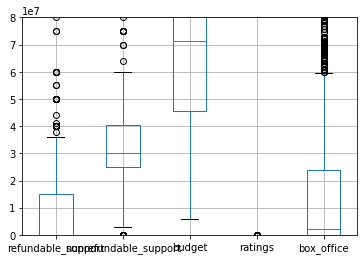

In [30]:
plt.ylim(-100,80000000)
print(df.boxplot())

In [31]:
display(df.describe())

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,332.00,332.00,332.00,6510.00,3155.00
mean,11864457.83,48980988.89,131422395.80,6.49,76546809.86
std,24916555.26,59980117.92,187148242.67,1.11,240457160.40
min,0.00,0.00,6000000.00,1.00,0.00
25%,0.00,25000000.00,45524799.50,5.90,86288.00
50%,0.00,30000000.00,71196901.50,6.60,2330104.00
75%,15000000.00,40375000.00,150000000.00,7.20,23995460.84
max,180000000.00,400000000.00,2305074303.00,9.90,3073568690.79


Проведя небольшой анализ мы можем увидеть, что аномально большие значения присутствуют во всех из данных столбцов, но так как в столбцах `refundable_support`, `nonrefundable_support` и `budget` слишком мало значений, то убирать их нецелесообразно. В тоже время в столбце `ratings` мы можем избавиться от аномально больших значений

In [32]:
outliers = df.query('ratings > 9').index
df = df.drop(index = outliers)
df.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,331.00,331.00,331.00,6493.00,3149.00
mean,11900302.11,49098756.23,131698596.39,6.48,76692027.97
std,24945704.90,60032473.70,187363805.25,1.10,240663157.83
min,0.00,0.00,6000000.00,1.00,0.00
25%,0.00,25000000.00,45846250.50,5.90,87810.00
50%,0.00,30000000.00,71517631.00,6.60,2347156.00
75%,15000000.00,40750000.00,150000000.00,7.20,24101208.37
max,180000000.00,400000000.00,2305074303.00,9.00,3073568690.79


Как мы можем видеть после удаления аномально больших значений в столбце `ratings` у нас было удалено менее 1% в каждом столбце, что значит, что эти данные мы можем удалить без сильного влияния на результаты.

#### Шаг 2.6. Добавление новых столбцов





In [33]:
df['year'] = df['show_start_date'].dt.year #Создание столбца с годом проката
display(df.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015


In [34]:
division('director_ns','director') #Создание новых столбцов с главными режиссерами и жанрами
division('main_genre','genres')
display(df.head(20))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_ns,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00,2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама


In [35]:
df['sup_part'] =  (df['refundable_support'] + df['nonrefundable_support'])/df['budget']*100 #определение части гос поддержки
#от общего бюджета в процентах
display(df.loc[df['budget']>0]) 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_ns,main_genre,sup_part
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,NaN,28140.00,2014,А.Якимчук,NaN,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,62.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,51.02
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,52.63
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,52.97
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,65.00


### Исследовательский анализ данных


2010    981
2019    926
2018    886
2016    815
2014    805
2015    700
2013    627
2011    622
2012    592
2017    505
Name: year, dtype: int64


<AxesSubplot:ylabel='Frequency'>

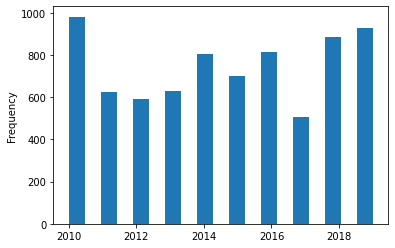

In [36]:
print(df['year'].value_counts())
df['year'].plot(kind='hist',bins=19 )

Больше всего выходило в прокат фильмов в 2010 и 2019 годах, меньше всего в 2012 и 2017 годах. 

In [37]:
office_count = df['box_office'][df['box_office']>=0].count() #Находим количество строк для которых известны сборы
print(office_count/df['title'].count()) #находим часть известных данных ко всем данным

0.4221745542297895


Всего лишь 42 процента фильмов имеют данные о прокате

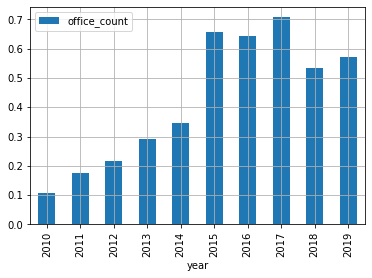

In [38]:
group_df = df.groupby(by=['year']).count()
group_df['office_count'] = group_df['box_office']/group_df['title']
plotting(group_df,'bar','office_count')

По графику мы можем видеть, что хуже всего информация представлена в 2010 и 2011 годах, больше всего информации имеется о 2015-2017 годах, при этом мы видим, что после 2014 года полнота информации резко растет, возможно с 2015 года сбору информации стали уделять больше внимания

,refundable_support,nonrefundable_support,budget,ratings,box_office,sup_part
year,,,,,,
2010,0.00,0.00,0.00,6104.80,2428654.00,0.00
2011,0.00,0.00,0.00,3761.70,14102765.00,0.00
2012,0.00,0.00,0.00,3570.50,6955423.00,0.00
2013,0.00,134347945.00,255435390.00,3771.20,29771926.20,94.64
2014,71000000.00,501002299.00,1302484783.00,4812.10,7444947564.20,882.11
2015,637153119.00,3009088340.00,7698669207.00,3903.50,39482825455.50,4807.99
2016,921500000.00,3381655482.00,7554942748.00,4532.60,47865967370.91,3505.50
2017,719346881.00,2464624781.00,7057172568.00,2752.90,48563707217.51,2075.51
2018,662000000.00,2784969465.00,7000664099.00,4182.30,49666815912.81,3051.33


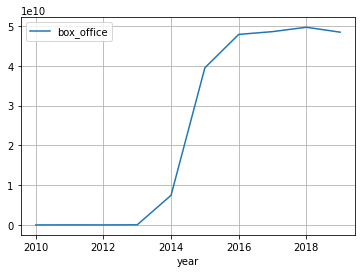

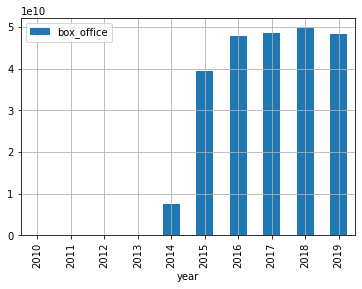

In [39]:
group_df = df.groupby(by=['year']).sum()
display(group_df)
plotting(group_df,'line','box_office')
plotting(group_df,'bar','box_office')

Как мы видим, до 2015 года суммы сборов были намного меньше (доастигая минимального значения в 2010 году), но в первую очередь это связано с маленьким количеством информации о сборах в этих года, максимальная сумма сборов была в 2018 году, даже не смотря на то, что данных о нем меньше чем о 2015-2017 годах.


,mean_box,median_box
year,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,162688.12,3500.00
2014,26780386.92,18885.00
2015,85646042.20,4972557.90
2016,91173271.18,3915041.02
2017,136032793.33,9968340.00
2018,104782312.05,8911533.94


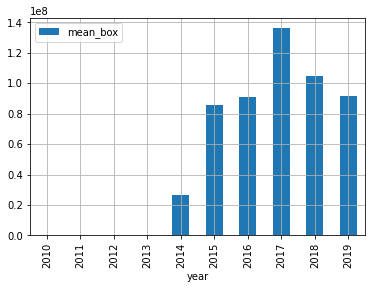

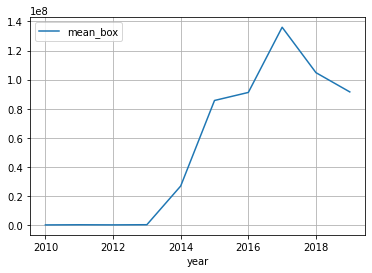

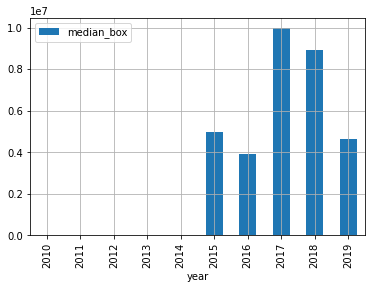

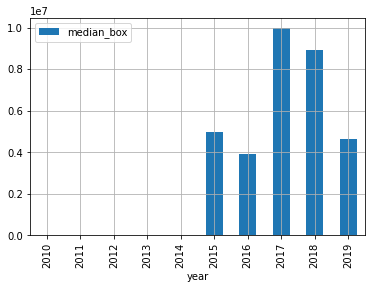

In [40]:
new_df = pd.pivot_table(df[df['box_office']>=0], index=['year'], values=['box_office'],aggfunc=[np.mean,np.median]) #Создание сводной таблицы
#где года взяты за индексы, а столбцы представлены средними и медианными сборами
new_df.columns = ['mean_box','median_box']
display(new_df)
plotting(new_df,'bar','mean_box')
plotting(new_df,'line','mean_box')
plotting(new_df,'bar','median_box')
plotting(new_df,'bar','median_box')


По данным мы можем увидеть, что средние значения очень сильно отличаются от медианных, так как лишь малое количество фильмов собирют большие кассовые сборы и они сильно влияют на средние значения, но при этом, как средние, так и медианные значения достигают своего максимума в 2017 году, что означает, что в тот год было больше успешных фильмов чем в другие года, наименьшие значения мы можем наблюдать в период с 2010 - 2014 года, что связано с малым количеством данных о данном периоде

title  puNumber  show_start_date  \
year age_restriction                                                            
2015 «0+» - для любой зрительской аудитории     49        49               49   
     «12+» - для детей старше 12 лет           137       137              137   
     «16+» - для детей старше 16 лет           246       246              246   
     «18+» - запрещено для детей               192       192              192   
     «6+» - для детей старше 6 лет              76        76               76   
2016 «0+» - для любой зрительской аудитории     72        72               72   
     «12+» - для детей старше 12 лет           135       135              135   
     «16+» - для детей старше 16 лет           268       268              268   
     «18+» - запрещено для детей               245       245              245   
     «6+» - для детей старше 6 лет              95        95               95   
2017 «0+» - для любой зрительской аудитории     44        44               44   
     «12+» - для детей старше 12 лет            70        70               70   
     «16+» - для детей старше 16 лет           153       153              153   
     «18+» - запрещено для детей               172       172              172   
     «6+» - для детей старше 6 лет              66        66               66   
2018 «0+» - для любой зрительской аудитории     77        77               77   
     «12+» - для детей старше 12 лет           241       241              241   
     «16+» - для детей старше 16 лет           234       234              234   
     «18+» - запрещено для детей               220       220              220   
     «6+» - для детей старше 6 лет             114       114              114   
2019 «0+» - для любой зрительской аудитории     72        72               72   
     «12+» - для детей старше 12 лет           202       202              202   
     «16+» - для детей старше 16 лет           265       265              265   
     «18+» - запрещено для детей               255       255              255   
     «6+» - для детей старше 6 лет             132       132              132   

                                             type  film_studio  \
year age_restriction                                             
2015 «0+» - для любой зрительской аудитории    49           49   
     «12+» - для детей старше 12 лет          137          137   
     «16+» - для детей старше 16 лет          246          246   
     «18+» - запрещено для детей              192          192   
     «6+» - для детей старше 6 лет             76           76   
2016 «0+» - для любой зрительской аудитории    72           72   
     «12+» - для детей старше 12 лет          135          135   
     «16+» - для детей старше 16 лет          268          268   
     «18+» - запрещено для детей              245          245   
     «6+» - для детей старше 6 лет             95           95   
2017 «0+» - для любой зрительской аудитории    44           44   
     «12+» - для детей старше 12 лет           70           70   
     «16+» - для детей старше 16 лет          153          153   
     «18+» - запрещено для детей              172          172   
     «6+» - для детей старше 6 лет             66           66   
2018 «0+» - для любой зрительской аудитории    77           77   
     «12+» - для детей старше 12 лет          241          236   
     «16+» - для детей старше 16 лет          234          234   
     «18+» - запрещено для детей              220          216   
     «6+» - для детей старше 6 лет            114          112   
2019 «0+» - для любой зрительской аудитории    72           72   
     «12+» - для детей старше 12 лет          202          201   
     «16+» - для детей старше 16 лет          265          263   
     «18+» - запрещено для детей              255          255   
     «6+» - для детей старше 6 лет            132          131   

                                             production_country  director 

sum_box     mean_box  \
year age_restriction                                                      
2015 «0+» - для любой зрительской аудитории   364902082.47   9602686.38   
     «12+» - для детей старше 12 лет        13616082008.91 186521671.35   
     «16+» - для детей старше 16 лет        11368068375.27  68482339.61   
     «18+» - запрещено для детей             5432308367.44  41153851.27   
     «6+» - для детей старше 6 лет           8701464621.41 167335858.10   
2016 «0+» - для любой зрительской аудитории   150228848.67   3664118.26   
     «12+» - для детей старше 12 лет        12204446524.39 148834713.71   
     «16+» - для детей старше 16 лет        16664216170.74  92067492.66   
     «18+» - запрещено для детей             6793929818.87  44992912.71   
     «6+» - для детей старше 6 лет          12053146008.24 172187800.12   
2017 «0+» - для любой зрительской аудитории   229598930.00  76532976.67   
     «12+» - для детей старше 12 лет         7851427660.67 191498235.63   
     «16+» - для детей старше 16 лет        18745042900.06 154917709.92   
     «18+» - запрещено для детей             9651495581.02  65656432.52   
     «6+» - для детей старше 6 лет          12086142145.76 268580936.57   
2018 «0+» - для любой зрительской аудитории    32449002.11   6489800.42   
     «12+» - для детей старше 12 лет        14267291660.69 212944651.65   
     «16+» - для детей старше 16 лет        16503602346.96 105792322.74   
     «18+» - запрещено для детей             8758498279.64  49205046.51   
     «6+» - для детей старше 6 лет          10104974623.41 148602567.99   
2019 «0+» - для любой зрительской аудитории    17746066.82   5915355.61   
     «12+» - для детей старше 12 лет        12680198773.67 149178809.10   
     «16+» - для детей старше 16 лет        12753418984.60  71648421.26   
     «18+» - запрещено для детей            10121796303.64  55310362.31   
     «6+» - для детей старше 6 лет          12852513658.86 160656420.74   

                                             median_box  
year age_restriction                                     
2015 «0+» - для любой зрительской аудитории  2767310.60  
     «12+» - для детей старше 12 лет        15351562.50  
     «16+» - для детей старше 16 лет         4878669.70  
     «18+» - запрещено для детей             4616614.70  
     «6+» - для детей старше 6 лет          23125984.70  
2016 «0+» - для любой зрительской аудитории  2571294.10  
     «12+» - для детей старше 12 лет         4690635.25  
     «16+» - для детей старше 16 лет         5180850.50  
     «18+» - запрещено для детей             6107001.74  
     «6+» - для детей старше 6 лет           3026256.15  
2017 «0+» - для любой зрительской аудитории 22178956.00  
     «12+» - для детей старше 12 лет         9010548.00  
     «16+» - для детей старше 16 лет         9702077.00  
     «18+» - запрещено для детей             8212677.00  
     «6+» - для детей старше 6 лет          51992103.00  
2018 «0+» - для любой зрительской аудитории  3616937.28  
     «12+» - для детей старше 12 лет         8931965.66  
     «16+» - для детей старше 16 лет         9010638.62  
     «18+» - запрещено для детей             7604029.00  
     «6+» - для детей старше 6 лет          14688850.32  
2019 «0+» - для любой зрительской аудитории  3885434.50  
     «12+» - для детей старше 12 лет         3405545.76  
     «16+» - для детей старше 16 лет         3210717.81  
     «18+» - запрещено для детей             5603216.55  
     «6+» - для детей старше 6 лет          14199614.88

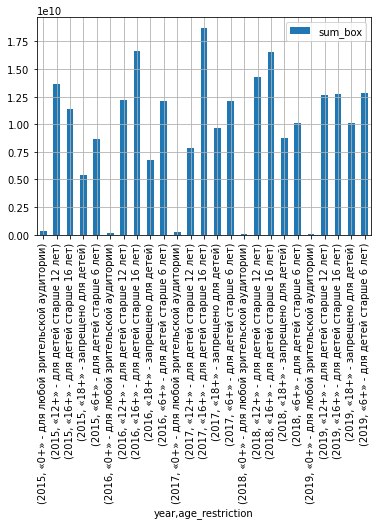

In [41]:
display(df[df['year']>2014].groupby(['year','age_restriction']).count())
new_df = pd.pivot_table(df[df['year']>2014],index=['year','age_restriction'],  values=['box_office'], aggfunc=[sum,np.mean,np.median])
new_df.columns = ['sum_box','mean_box','median_box']
display(new_df)
plotting(new_df,'bar','sum_box')


Исходя из графиков, мы можем увидеть, что меньше всего из года в год собирают фильм с возрастным ограничением 0+, но также стоит заметить, что таких фильмов и меньше всего. Больше всего собирают фильмы с рейтингом 16+, кроме 2015 и 2019 года (12+ и 6+ соответственно). Это может быть связано с тем, что большинство фильмов относятся к данным возврастным ограничениям

### Исследование фильмов, которые получили государственную поддержку



In [42]:
df_gover = df.loc[df['budget']>0].copy()
df_gover['income'] = df_gover['box_office'] - df_gover['budget'] #Создаем столбце в котором будут данные по доходности фильмов
df_gover['all_sup'] = df_gover['refundable_support']+df_gover['nonrefundable_support']
display(df_gover)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,director_ns,main_genre,sup_part,income,all_sup
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,33.37,-79046546.40,26500000.00
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,NaN,NaN,28140.00,2014,А.Якимчук,NaN,70.00,-37114717.00,26000000.00
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,61.27,-156066458.50,107847945.00
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01,-40518222.50,28000000.00
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,62.48,-39783022.00,25000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,...,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,51.02,-262296814.47,500000000.00
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,...,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,52.63,311069235.00,100000000.00
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,...,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,52.97,NaN,500000000.00
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,65.00,NaN,30000000.00


In [43]:
df_gover.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,year,sup_part,income,all_sup
count,331.00,331.00,331.00,315.00,317.00,331.00,331.00,317.00,331.00
mean,11900302.11,49098756.23,131698596.39,6.01,132849131.94,2016.73,54.30,552167.83,60999058.34
std,24945704.90,60032473.70,187363805.25,1.13,335284646.39,1.64,19.66,316401832.68,72811671.94
min,0.00,0.00,6000000.00,1.00,1550.00,2013.00,4.40,-1971477243.41,3000000.00
25%,0.00,25000000.00,45846250.50,5.30,1250996.00,2015.00,38.61,-70903859.00,25422500.00
50%,0.00,30000000.00,71517631.00,6.20,16077204.00,2017.00,61.54,-40843410.00,35000000.00
75%,15000000.00,40750000.00,150000000.00,6.70,106514301.03,2018.00,66.16,-2312697.88,60000000.00
max,180000000.00,400000000.00,2305074303.00,9.00,3073568690.79,2019.00,100.00,2913568690.79,500000000.00


Как мы можем увидеть, большинство фильмов получают государственную поддержку в районе 50%, средний рейтинг фильмов с государственной поддержкой находитсяв районе 6, при этом минимальная оценка равна 1, а максимальная 9,4. 

In [44]:
uniquev(df_gover,'type')

Художественный    299
Анимационный       31
Документальный      1
Name: type, dtype: int64


Практически все фильмы получившие государственную поддержку относятся к художественным (90%), 31 фильм является анимационным (9%) и всего 1 фильм является документальным

In [45]:
uniquev(df_gover,'main_genre')

драма          93
комедия        74
мультфильм     31
мелодрама      15
триллер        15
фэнтези        11
фантастика     10
ужасы          10
военный         9
приключения     7
семейный        7
боевик          6
детектив        5
мюзикл          4
детский         4
история         4
биография       3
криминал        3
спорт           3
реальное ТВ     1
Name: main_genre, dtype: int64


Большинство фильмов относятся к жанру драма и комедия

In [46]:
uniquev(df_gover,'financing_source')

Министерство культуры               163
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64


Все фильмы спонсируются или Министерством культуры или Фондом кино

In [47]:
uniquev(df_gover,'age_restriction')

«16+» - для детей старше 16 лет           125
«12+» - для детей старше 12 лет           106
«6+» - для детей старше 6 лет              64
«18+» - запрещено для детей                28
«0+» - для любой зрительской аудитории      8
Name: age_restriction, dtype: int64


Большинство фильмов относятся к возрастным группам 16+ и 12+

In [48]:
df_gover_group = df_gover.groupby('year').sum()
display(df_gover_group)

,refundable_support,nonrefundable_support,budget,ratings,box_office,sup_part,income,all_sup
year,,,,,,,,
2013,0.00,134347945.00,255435390.00,13.40,20322385.10,94.64,-235113004.90,134347945.00
2014,71000000.00,501002299.00,1302484783.00,90.10,1017422166.60,882.11,-285062616.40,572002299.00
2015,637153119.00,3009088340.00,7698669207.00,500.20,5784950668.14,4807.99,-1871719554.86,3646241459.00
2016,921500000.00,3381655482.00,7554942748.00,323.60,6081707839.10,3505.50,-1454528828.90,4303155482.00
2017,719346881.00,2464624781.00,7057172568.00,234.00,10865075300.96,2075.51,3913502732.96,3183971662.00
2018,662000000.00,2784969465.00,7000664099.00,318.10,9934069010.25,3051.33,2933404911.25,3446969465.00
2019,928000000.00,3976000000.00,12722866609.00,413.80,8409627454.63,3555.58,-2825446437.37,4904000000.00


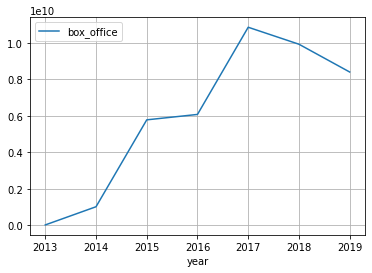

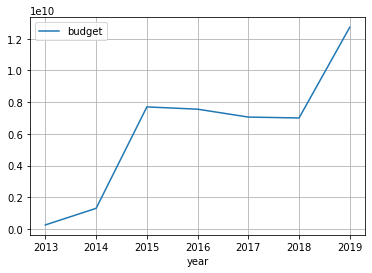

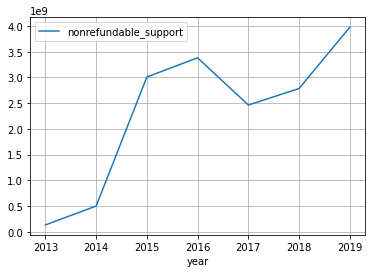

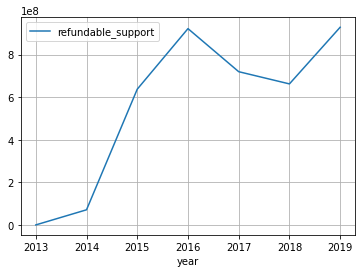

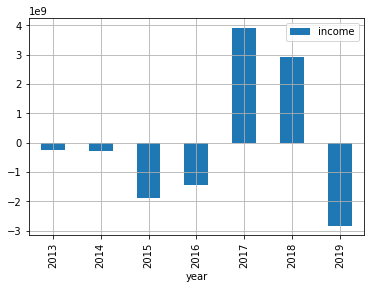

In [49]:
plotting(df_gover_group,'line','box_office')
plotting(df_gover_group,'line','budget')
plotting(df_gover_group,'line','nonrefundable_support')
plotting(df_gover_group,'line','refundable_support')
plotting(df_gover_group,'bar','income')

Как мы можем видеть, общий бюджет фильмов стал расти с 2018 года, при этом общие сборы фильмов стали падать в тот же год. Количество государственной поддержки в период с 2014 по 2019 года увеличилось в разы, при этом все фильмы получившие государственную поддержку окупились лишь в 2017 и 2018 годах, больше всего денежных потерь было в 2019 году.

In [50]:
df_gover_group = df_gover.drop(['nonrefundable_support','refundable_support','puNumber','show_start_date','title','type','film_studio','production_country','director','producer','age_restriction','financing_source','genres','main_genre','director_ns'],axis=1)
display(df_gover_group)

,budget,ratings,box_office,year,sup_part,income,all_sup
1281,79411900.00,8.10,365353.60,2013,33.37,-79046546.40,26500000.00
1448,37142857.00,NaN,28140.00,2014,70.00,-37114717.00,26000000.00
1498,176023490.00,5.30,19957031.50,2013,61.27,-156066458.50,107847945.00
1524,40574140.00,4.20,55917.50,2014,69.01,-40518222.50,28000000.00
1792,40015122.00,6.40,232100.00,2014,62.48,-39783022.00,25000000.00
...,...,...,...,...,...,...,...
7464,980000000.00,6.00,717703185.53,2019,51.02,-262296814.47,500000000.00
7466,190000000.00,6.70,501069235.00,2019,52.63,311069235.00,100000000.00
7474,944000000.00,5.70,NaN,2019,52.97,NaN,500000000.00
7476,46154000.00,5.90,NaN,2019,65.00,NaN,30000000.00


            budget  ratings  box_office  year  sup_part  income  all_sup
budget        1.00     0.09        0.38  0.16     -0.29   -0.19     0.74
ratings       0.09     1.00        0.15  0.04     -0.06    0.09     0.11
box_office    0.38     0.15        1.00  0.12     -0.09    0.84     0.49
year          0.16     0.04        0.12  1.00     -0.10    0.03     0.13
sup_part     -0.29    -0.06       -0.09 -0.10      1.00    0.09     0.11
income       -0.19     0.09        0.84  0.03      0.09    1.00     0.10
all_sup       0.74     0.11        0.49  0.13      0.11    0.10     1.00


array([[<AxesSubplot:xlabel='budget', ylabel='budget'>,
        <AxesSubplot:xlabel='ratings', ylabel='budget'>,
        <AxesSubplot:xlabel='box_office', ylabel='budget'>,
        <AxesSubplot:xlabel='year', ylabel='budget'>,
        <AxesSubplot:xlabel='sup_part', ylabel='budget'>,
        <AxesSubplot:xlabel='income', ylabel='budget'>,
        <AxesSubplot:xlabel='all_sup', ylabel='budget'>],
       [<AxesSubplot:xlabel='budget', ylabel='ratings'>,
        <AxesSubplot:xlabel='ratings', ylabel='ratings'>,
        <AxesSubplot:xlabel='box_office', ylabel='ratings'>,
        <AxesSubplot:xlabel='year', ylabel='ratings'>,
        <AxesSubplot:xlabel='sup_part', ylabel='ratings'>,
        <AxesSubplot:xlabel='income', ylabel='ratings'>,
        <AxesSubplot:xlabel='all_sup', ylabel='ratings'>],
       [<AxesSubplot:xlabel='budget', ylabel='box_office'>,
        <AxesSubplot:xlabel='ratings', ylabel='box_office'>,
        <AxesSubplot:xlabel='box_office', ylabel='box_office'>,
        <A

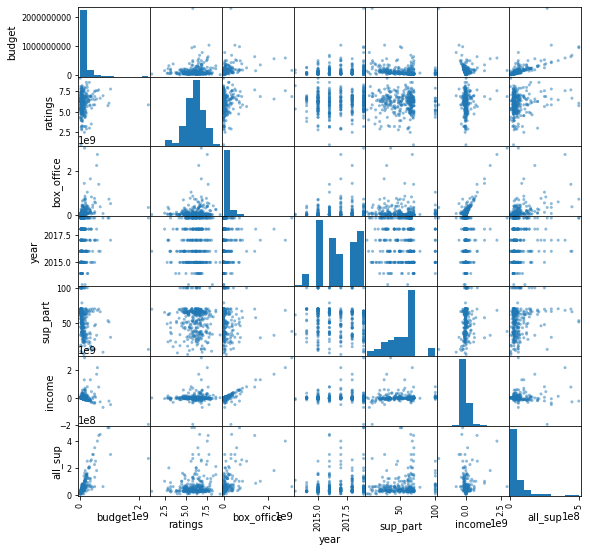

In [51]:
print(df_gover_group.corr())
pd.plotting.scatter_matrix(df_gover_group, figsize=(9, 9)) 

Как мы видим существует очень высокая взаимосвязь между общим бюджетом и общей поддержкой, что неудивительно. Рейтинг имеет очень слабую зависимость с любым из факторов, что значит что он не зависит не от чего. Общий доход завсисит от прибыли, что также неудивительно. Все остальные факторы, такие как год выпуска фильма или части поддержки никак не влияют на рейтинги или доходность фильмов.

### Общий вывод

По итогу можно сказать, что Министерство культуры правильно выделило основные популярные жанры и типы фильмов в данный момент, при этом количество поддержки, оказываемой отечественной киноиндустрии, сильно влияет на общее качество фильмов и большинству зрителей они интересны.